-------------------------------------------------------------
Sai Praneeth - A69027380
----------------------------------------------------------------

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  matplotlib.ticker import PercentFormatter


In [51]:
class GetVisualization:
    '''
    A class which is used to generate visualizations
    
    Usage :
    -------------------------------------------------------------------------------------------------------------------------------------------------------------------
     >>>class_object= GetVisualization(dataframe) - Pass the dataframe which you want to visualize
     
     >>>>>generated_plot= class_object.categoricalPlot(**kwargs) - Pass all the necessary parameters for seaborn catplot like x,y,hue,kind,aspect,height,order
     
     >>>>>generated_plot= class_object.countPlot(**kwargs) - Can be used if you want to customize the graphs into axes else use categoricalPlot.
     
     >>>>>generated_plot=class_object.pieChart(list_of_values,**kwargs) - Used for plotting a pie chart where list of values is the value_counts of the specific column,
                                                                        Kwargs include parameters labels,autopct, explode
    
     >>>>>generated_plot=class_object.heatMap(**kwargs) - Plots a heatmap of the dataframe you instantiated with and parameters are annot,fmt
     
     If we want to change the title and the labels of the default implementation
     
     >>>>>generated_plot= class_object.changelabelsAndTitle(generated_plot,**kwargs) where Kwargs include title,xlabel,ylabel,xticklabels,yticklabels
     setting the returned value from changelabelsAndTitle to the same generated_plot because we want to update the visulaization instaed of having a new visualization
     -------------------------------------------------------------------------------------------------------------------------------------------------------------------
    '''  
    def __init__(self,dataframe):
        '''
        Initializing the class with a dataframe. Doing so will allow us to have a centralized control over each plot
        
        '''
        assert isinstance(dataframe,pd.DataFrame),'Provide a dataframe instance'
        
        self.dataframe=dataframe
    
    def categoricalPlot(self,**kwargs):
        '''
        Generates a seaborn cat plot using the parameters. Takes the input parameters which a normal seaborn catplot takes
        Args:
            x,y,hue (str) : Strings corresponding to column names we want to visualize
            aspect, height (int) : parameters related to height and width of the figure
            kind (str) : type of plot we want to visualize
        Returns:
            seaborn.axisgrid.FacetGrid object
        '''
        
        g=sns.catplot(x=kwargs.get('x',None),y=kwargs.get('y',None),hue=kwargs.get('hue',None),aspect=kwargs.get('aspect',1),height=kwargs.get('height',5),kind=kwargs.get('kind',None),data=self.dataframe,order=kwargs.get('order',None))
        
        return g
    
    def countPlot(self,**kwargs):
        '''
        Generates a seaborn countt plot using the parameters. Takes the input parameters which a normal seaborn catplot takes
        Args:
            x,y,hue (str) : Strings corresponding to column names we want to visualize
            aspect, height (int) : parameters related to height and width of the figure
            kind (str) : type of plot we want to visualize
        Returns:
            matplotlib.axes object
        '''
        
        g=sns.countplot(x=kwargs.get('x',None),y=kwargs.get('y',None),hue=kwargs.get('hue',None),ax=kwargs.get('ax',None),data=self.dataframe,order=kwargs.get('order',None),width=kwargs.get('width',0.8))
        
        return g
    
    def changelabelsAndTitle(self,fig_obj,**kwargs):
        '''
        Changes the title and axis labels of the facetegrid object. MAKE SURE that the parameters xlabel,ylabel,xticklabels,yticklabels and title is passed else default values will be imputed
        Args:
            fig_obj (seaborn.axisgrid.FacetGrid) : A seaborn.axisgrid.FacetGrid object to which modfications needs to be applied
        Returns :
            seaborn.axisgrid.FacetGrid after updating the necessary labels and title as specified by the input kwargs
        
        '''
        assert isinstance(fig_obj,(sns.axisgrid.FacetGrid,matplotlib.axes._axes.Axes)),'You must pass a seaborn facetgrid object'
        
        if isinstance(fig_obj,sns.axisgrid.FacetGrid):
            for ax in fig_obj.axes.flat:
                y_labels=ax.get_yticklabels()
                x_labels=ax.get_xticklabels()
                
            fig_obj.fig.suptitle(kwargs.get('title',None),y=1.03)
            
        elif isinstance(fig_obj,matplotlib.axes._axes.Axes):
            y_labels=fig_obj.get_yticklabels()
            x_labels=fig_obj.get_xticklabels()
            
            fig_obj.set_title(kwargs.get('title',None),y=1.03)
                        
        
        
        fig_obj.set(xlabel=kwargs.get('xlabel',None),ylabel=kwargs.get('ylabel',None),yticklabels=kwargs.get('yticklabels',y_labels),xticklabels=kwargs.get('xticklabels',x_labels))
        
        return fig_obj
    
    def pieChart(self,data,**kwargs):
        '''
        A method that returns a pie chart matplotlib.axes object which uses matplotlib.pyplot
        Args:
            data (list) : List of values that go into the pie chart, generally value_counts of the sepcific column you want to visualize
            Kwargs (dict): Rest of parameters that are used as arguments to plt.pie 
        Returns:
            matplotlib.axes object
        '''
        assert isinstance(data,list),'Provided data is incorrect'
        
        plt.pie(data,labels=kwargs.get('labels',None),autopct=kwargs.get('autopct','%1.0f%%'), explode=kwargs.get('explode',None),pctdistance=kwargs.get('pctdistance',0.6))
        plt.title(kwargs.get('title',None))
        
        return plt
    
    def heatMap(self,**kwargs):
        '''
        A metd that retruns a heatmap which is a matplotlib.axes object
        Args:
            kwargs (dict) : parameters that are used as arguments to sns.heatmap
        Returns:
            matplotlib.axes object
        '''
        return sns.heatmap(self.dataframe,annot=kwargs.get('annot',False),fmt=kwargs.get('fmt','.1f'))

In [52]:
# Pre_processed_data.csv is the file which is used for visualizations.
data=pd.read_csv('pre_processed_data.csv')
map_age_to_age_groups={'0':'0-2','1':'0-2','2':'0-2','3':'3-5','4':'3-5','5':'3-5','6':'6-11','7':'6-11','8':'6-11','9':'6-11','10':'6-11','11':'6-11'}
data['Child_age_groups']=data['Child_age_0_11'].map(map_age_to_age_groups)

In [53]:
def add_percentage_labels_when_y(plot, feature, ax,max_count,x_val,y_val):
    """
    It take the figure objects and calculates the perecntage of the corresponding bar value based on the points inferred from the plot 
    In this function we annotate the labels when the (grouped)  bars are aligned on y axis
    Args:
        plot (seaborn.axisgrid.FacetGrid) : The figure or axes object 
        feature ('string') : The feature name or the axis where we want to add the percenatge labels
        ax (matplotlib.pyplot.gca()) : Get Current axes object generated from the visualization
        max_count (int) : It is generally the total no. of data points which is used for calculating the percenatge of the labels
        x_val (float) : Adjustment of the x position of the percentage annotation on the visualization
        y_val (float) : Adjustment of the y position of the percentage annotation on the visualization
    Returns:
        None - It annotates the plot passed as arguments to the fucntion with percentage values over the bars aligned over y axis
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / max_count)
        x = p.get_x() + p.get_width()
        y = p.get_y()
        if(percentage!='0.0%'):
            ax.annotate(percentage, (x+x_val, y+y_val), fontsize=10, color='black')
            
def add_percentage_labels_when_x(plot, feature, ax,max_count,y_val):
    """
    It take the figure objects and calculates the perecntage of the corresponding bar value based on the points inferred from the plot 
    The only difference of this function from the above add_percentage_labels_when_y is, the orientation of the visualization.
    That is in this function we annotate the labels when the (grouped) bars are aligned on x axis
    Args:
        plot (seaborn.axisgrid.FacetGrid) : The figure or axes object 
        feature ('string') : The feature name or the axis where we want to add the percenatge labels
        ax (matplotlib.pyplot.gca()) : Get Current axes object generated from the visualization
        max_count (int) : It is generally the total no. of data points which is used for calculating the percenatge of the labels
        x_val (float) : Adjustment of the x position of the percentage annotation on the visualization
        y_val (float) : Adjustment of the y position of the percentage annotation on the visualization
    Returns:
        None - It annotates the plot passed as arguments to the fucntion with percentage values over the bars aligned over x axis
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / max_count)
        x = p.get_x()
        y = p.get_height()
        if(percentage!='0.0%'):
            ax.annotate(percentage, (x, y+y_val), fontsize=10, color='black')

/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


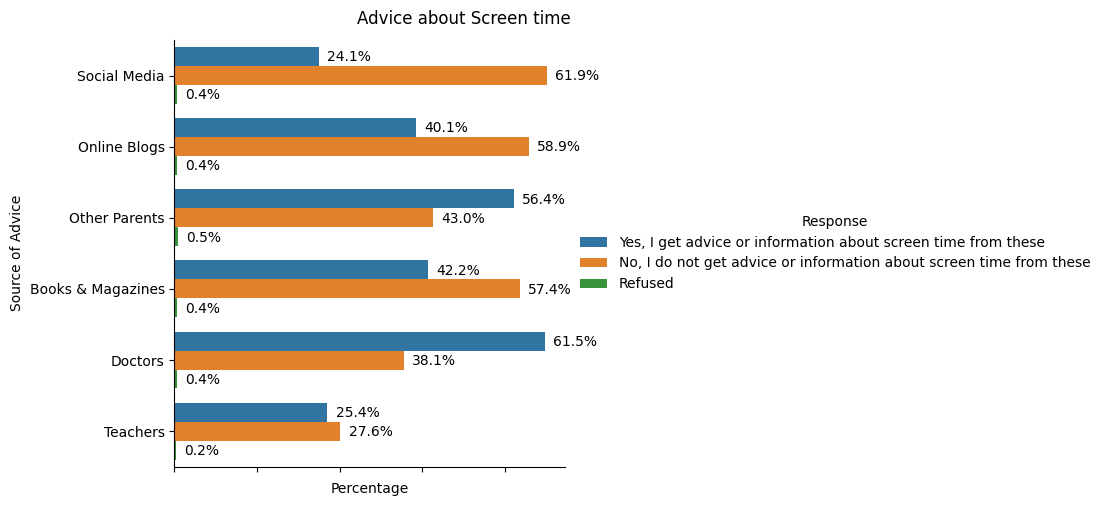

In [60]:
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
screen_time_df=data[['ADV_socialmedia','ADV_online_blogs','ADV_other_parents','ADV_books_magazines','ADV_doctors','ADV_teachers']].melt(var_name='advice_from', value_name='Response')

# Class instantiation
screen_time=GetVisualization(screen_time_df)

# Generating a catplot visualization using the class instance
screen_time_plot=screen_time.categoricalPlot(y='advice_from',hue='Response',kind='count',aspect=1.5,height=5)

# Updating the labels of the visualization using a class method
screen_time_plot=screen_time.changelabelsAndTitle(screen_time_plot,title='Advice about Screen time',xlabel='Percentage', ylabel='Source of Advice',yticklabels=['Social Media','Online Blogs','Other Parents','Books & Magazines','Doctors','Teachers'],xticklabels='')

# Adding annotations to the visulaization
add_percentage_labels_when_y(screen_time_plot, 'advice_from', plt.gca(),len(data),50,0.2) 

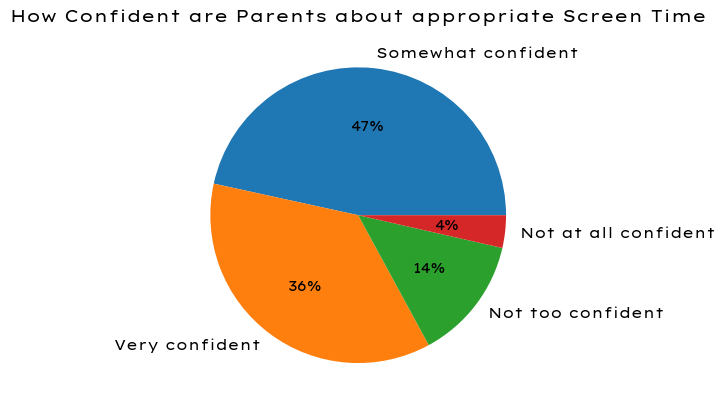

In [57]:
# Class instantiation
pieObject=GetVisualization(data)

# Generating a pieChart visualization using the class instance
confidence_abt_screen_time=pieObject.pieChart(data[data['Confidence_abt_screen_time']!='Refused']['Confidence_abt_screen_time'].value_counts().tolist(),labels=data[data['Confidence_abt_screen_time']!='Refused']['Confidence_abt_screen_time'].dropna().unique().tolist(),autopct='%1.0f%%',title='How Confident are Parents about appropriate Screen Time')
confidence_abt_screen_time.show()

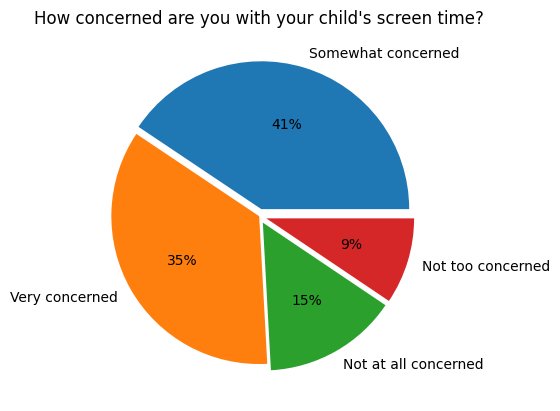

In [66]:
# Generating a pieChart visualization using the class instance
concern_abt_screen_time=pieObject.pieChart(data[data['CO_screen_time']!='Refused']['CO_screen_time'].value_counts().tolist(),labels=data[data['CO_screen_time']!='Refused']['CO_screen_time'].dropna().unique().tolist(),autopct='%1.0f%%',title='How concerned are you with your child\'s screen time?',explode=[0.05,0,0.05,0.05])
concern_abt_screen_time.show()

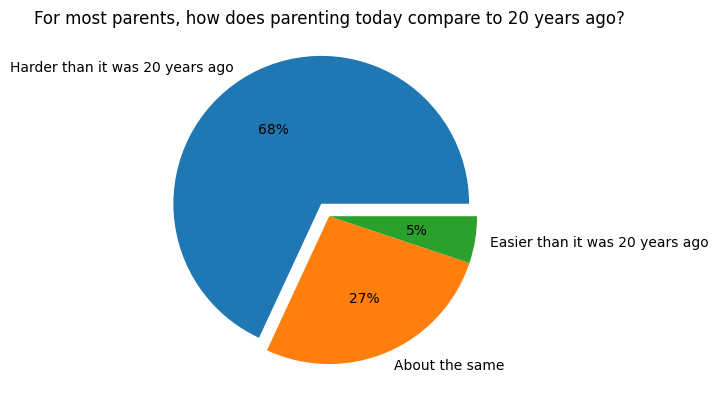

In [94]:
# Generating a pieChart visualization using the class instance
present_days_parenting=pieObject.pieChart(data[data['How_is_curret_days_parenting']!='Refused']['How_is_curret_days_parenting'].value_counts().tolist(),labels=data[data['How_is_curret_days_parenting']!='Refused']['How_is_curret_days_parenting'].unique().tolist(),autopct='%1.0f%%',title='For most parents, how does parenting today compare to 20 years ago?',explode=[0.1,0,0])
present_days_parenting.show()

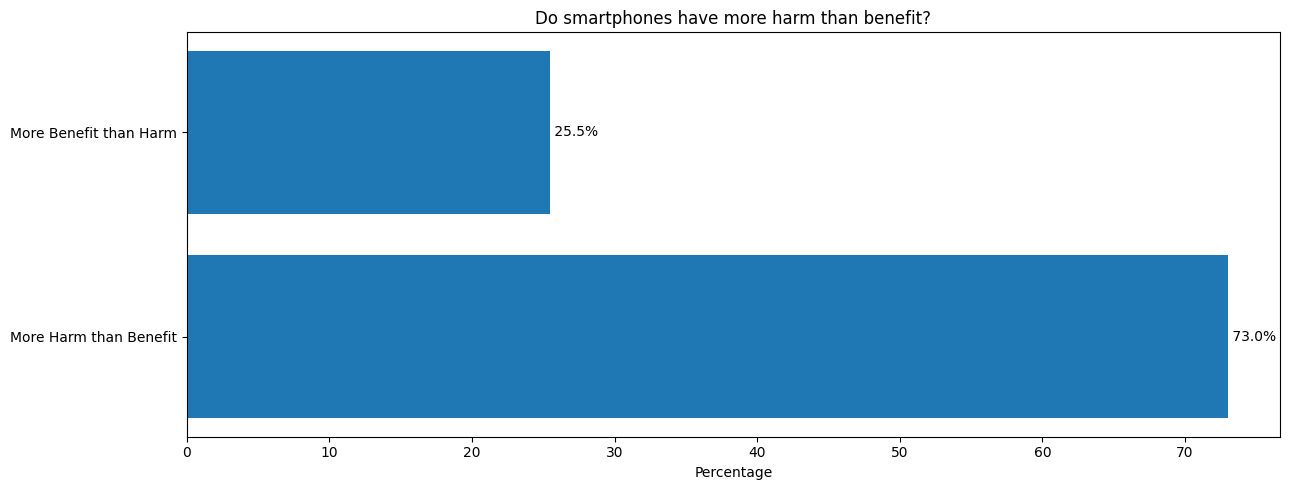

In [113]:
# Data for plotting
categories = ['More Harm than Benefit', 'More Benefit than Harm']
percentages = [73.0, 25.5]

# Plotting the bar chart
plt.figure(figsize=(13, 5))  # Adjust the size to be similar to the provided image
plt.barh(categories, percentages)
plt.xlabel('Percentage')
plt.title('Do smartphones have more harm than benefit?')

# Adding the data labels
for index, value in enumerate(percentages):
    plt.text(value, index, f' {value}%', va='center')

# Show the plot
plt.tight_layout()
plt.show()


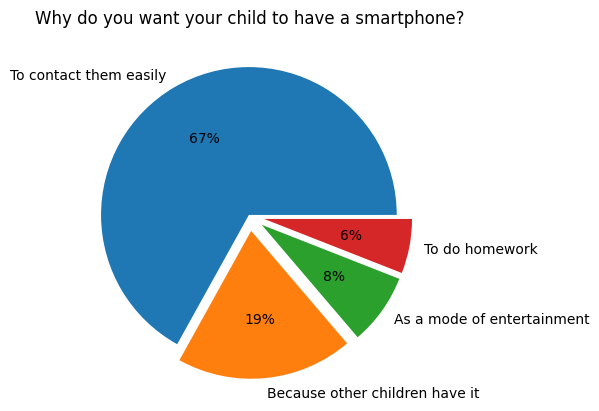

In [87]:
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
major_reason_df=data[['RS_to_contact', 'RS_peer_kids_have','RS_entertainment','RS_to_do_homework']].melt(var_name='Reason',value_name='response')
major_reason_df=major_reason_df.loc[major_reason_df['response']=='Major reason']

# Generating a pieChart visualization using the class instance
major_reason_for_giving_smartphones=pieObject.pieChart(major_reason_df['Reason'].value_counts().tolist(),labels=['To contact them easily','Because other children have it','As a mode of entertainment','To do homework'],autopct='%1.0f%%',explode=[0.01, 0.1, 0.1, 0.1],title='Why do you want your child to have a smartphone?')
major_reason_for_giving_smartphones.show()

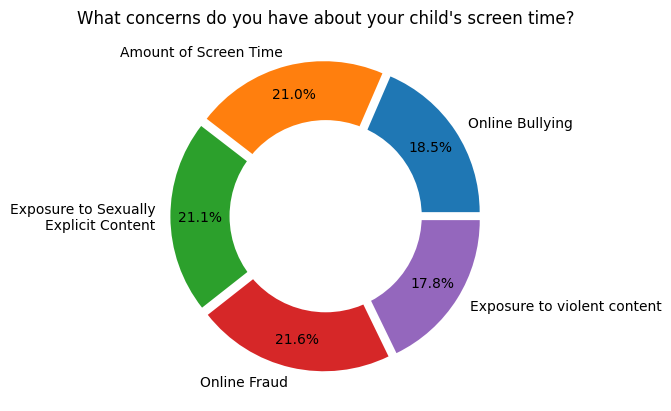

In [69]:
major_concern_df=data[['CO_online_bully','CO_screen_time','CO_sexual_explicit_content','CO_online_fraud','CO_violent_content']].apply(lambda x:len(x.loc[x=='Very concerned']))
major_concern_plot=pieObject.pieChart(major_concern_df.values.tolist(),labels=['Online Bullying','Amount of Screen Time','Exposure to Sexually\nExplicit Content','Online Fraud','Exposure to violent content'],autopct='%0.1f%%',pctdistance=0.80,explode=[0.05, 0.05, 0.05, 0.05, 0.05],title='What concerns do you have about your child\'s screen time?')


hole = major_concern_plot.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


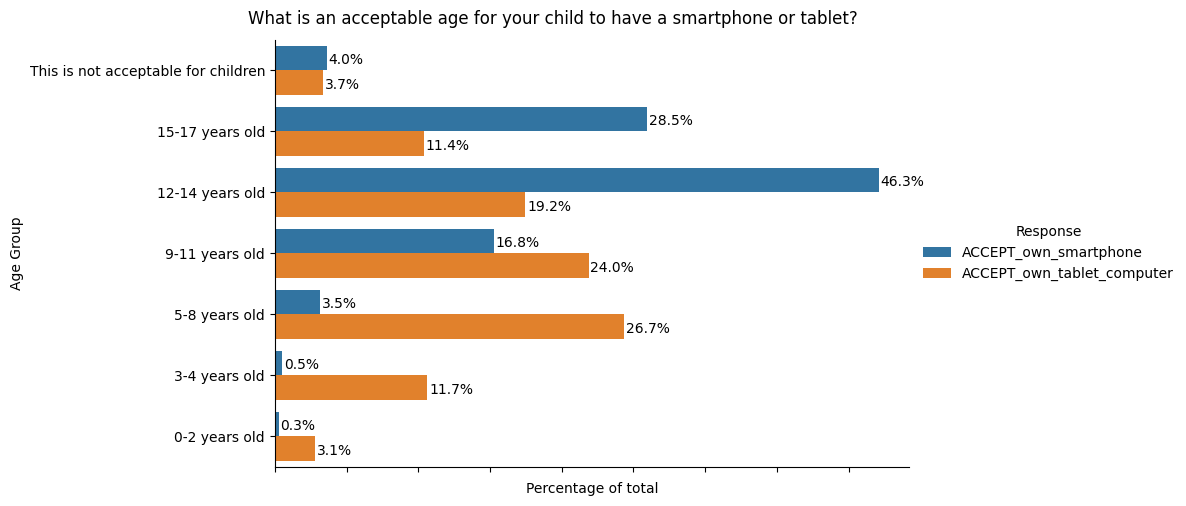

In [70]:
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
acceptable_age_df=data[['ACCEPT_own_smartphone','ACCEPT_own_tablet_computer']].melt(value_name='Accept_having _smartphone',var_name='Response')

# Class instantiation
acceptable_age=GetVisualization(acceptable_age_df)

# Generating a catplot visualization using the class instance
acceptable_age_plot=acceptable_age.categoricalPlot(y='Accept_having _smartphone',hue='Response',kind='count',height=5,aspect=2,order=['0-2 years old','3-4 years old', '5-8 years old','9-11 years old','12-14 years old','15-17 years old','This is not acceptable for children',][::-1])

# Updating the labels of the visualization using a class method
acceptable_age_plot=acceptable_age.changelabelsAndTitle(acceptable_age_plot,title='What is an acceptable age for your child to have a smartphone or tablet?',xticklabels='',xlabel='Percentage of total',ylabel='Age Group')

# Adding annotations to the visulaization
add_percentage_labels_when_y(acceptable_age_plot,'Accept_having _smartphone',plt.gca(),len(data),5,0.3)

/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


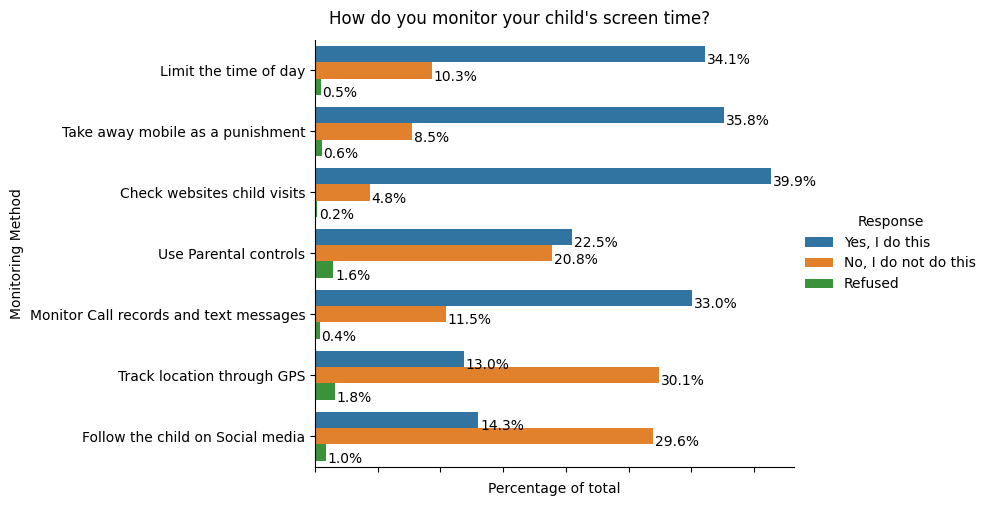

In [67]:
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
monitor_df=data[['MNT_websites','MNT_take_away_mobile','MNT_screentime','MNT_call_records','MNT_parental_controls','MNT_socialmedia','MNT_gps']].melt(var_name='monitor_child_activities',value_name='Response')

# Class instantiation
monitor_activities=GetVisualization(monitor_df)

# Generating a catplot visualization using the class instance
monitor_activities_plot=monitor_activities.categoricalPlot(y='monitor_child_activities',hue='Response',kind='count',aspect=1.5)

# Updating the labels of the visualization using a class method
monitor_activities_plot=monitor_activities.changelabelsAndTitle(monitor_activities_plot,title="How do you monitor your child's screen time?",yticklabels=['Limit the time of day','Take away mobile as a punishment','Check websites child visits','Use Parental controls','Monitor Call records and text messages','Track location through GPS','Follow the child on Social media'],xlabel='Percentage of total',ylabel='Monitoring Method',xticklabels='')

# Adding annotations to the visulaization
add_percentage_labels_when_y(monitor_activities_plot,'monitor_child_activities',plt.gca(),len(data),5,0.3)

/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3370: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3370: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3370: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3370: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kylewade/Library/Python/3.9/l

[None, None, None]

/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3370: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kylewade/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3370: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


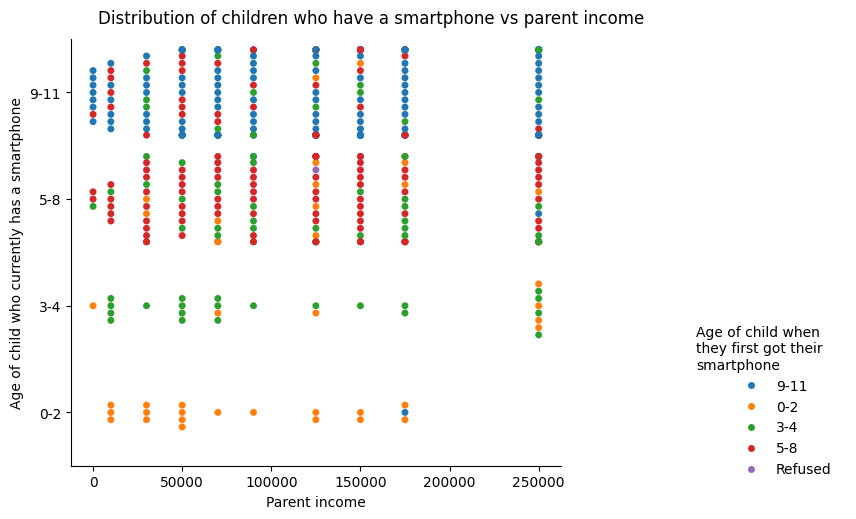

In [85]:
# Generating a catplot visualization using the class instance
own_smartphone_plot=pieObject.categoricalPlot(kind='swarm',y='Child_owns_smartphone_age',x='P_income',order=['9-11','5-8','3-4','0-2'],hue='Child_first_age_smartphone',aspect=1.2) 

# Updating the labels of the visualization using a class method
own_smartphone_plot=pieObject.changelabelsAndTitle(own_smartphone_plot,xlabel='Parent income',ylabel='Age of child who currently has a smartphone',title='Distribution of children who have a smartphone vs parent income')

# Adding extra customizations which is not implemented in the class
own_smartphone_plot._legend.set(title='Age of child when           .\nthey first got their\nsmartphone',loc='lower right',bbox_to_anchor=(1.1,0.06))

Text(6, 2.9, 'Percentage')

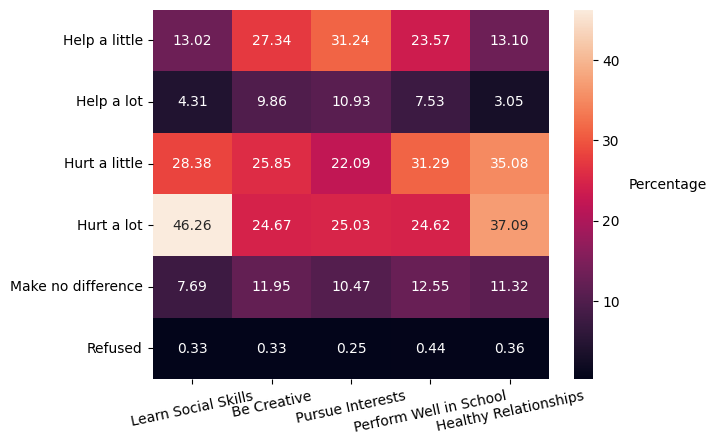

In [18]:
# Using dataframe.melt on specific columns to instantiate the class object intsead of suing the entire dataframe
opinion_df=data[['ML_learn_social_skills','ML_be_creative','ML_pursue_interest','ML_do_well_in_school','ML_healthy_frienships']].apply(pd.Series.value_counts).apply(lambda x: x/x.sum()*100)

# Class instantiation
opinion=GetVisualization(opinion_df)

# Generating a heatmap visualization using the class instance
opinion_plot=opinion.heatMap(annot=True,fmt='.2f')

# Updating the labels of the visualization using a class method
opinion_plot.set_xticklabels(labels=['Learn Social Skills','Be Creative','Pursue Interests','Perform Well in School','Healthy Relationships'],rotation=12)

# Adding extra customization which is not implemented in the class
opinion_plot.text(6,2.9,'Percentage')

/var/folders/fc/hvd2_2zd403gvcjrwx7bcsdm0000gn/T/ipykernel_88726/2591820257.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig_obj.set(xlabel=kwargs.get('xlabel',None),ylabel=kwargs.get('ylabel',None),yticklabels=kwargs.get('yticklabels',y_labels),xticklabels=kwargs.get('xticklabels',x_labels))
/var/folders/fc/hvd2_2zd403gvcjrwx7bcsdm0000gn/T/ipykernel_88726/2591820257.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig_obj.set(xlabel=kwargs.get('xlabel',None),ylabel=kwargs.get('ylabel',None),yticklabels=kwargs.get('yticklabels',y_labels),xticklabels=kwargs.get('xticklabels',x_labels))


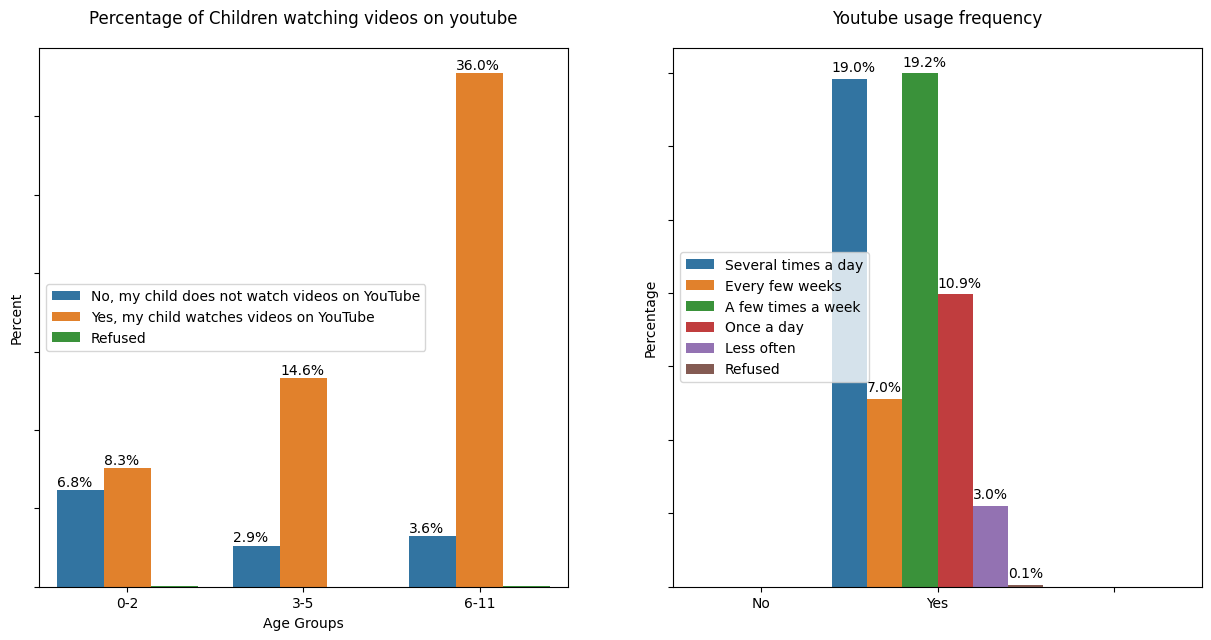

In [36]:
fig,ax=plt.subplots(1,2,figsize=(15,7))

# Class instantaiation
youtube=GetVisualization(data)

# Generating a countplot visualization using the class instance
youtube_plot_0=youtube.countPlot(x='Child_age_groups',hue='Uses_youtube',order=['0-2','3-5','6-11'],ax=ax[0])
# Updating the labels of the visualization using a class method
youtube_plot_0=youtube.changelabelsAndTitle(youtube_plot_0,title='Percentage of Children watching videos on youtube',xlabel='Age Groups', ylabel='Percent',yticklabels='')
youtube_plot_0.legend(loc='center left')

# Generating a countplot visualization using the class instance
youtube_plot_1=youtube.countPlot(x='Uses_youtube',hue='How_often_youtube',ax=ax[1],width=1.2)
# Updating the labels of the visualization using a class method
youtube_plot_1=youtube.changelabelsAndTitle(youtube_plot_1,title='Youtube usage frequency',xticklabels=['No','Yes',''],yticklabels='',ylabel='Percentage')
youtube_plot_1.legend(loc='center left')

list_of_axes=['Uses_youtube','How_often_youtube']

# Adding extra customization which is not implemented in the class
count=0
for ax in plt.gcf().get_axes():
    add_percentage_labels_when_x(ax,list_of_axes[count], ax,len(data),10)
    count+=1

In [37]:
tech=(data['RE_tech_companies'].value_counts(normalize=True)*100).round(2).to_frame()
tech.index.name='Amount of responsibility'
tech.columns=['Responsibity of tech comapnies']

govt=(data['RE_government'].value_counts(normalize=True)*100).round(2).to_frame()
govt.index.name='Amount of responsibility'
govt.columns=['Responsibity of Government']

parents=(data['RE_parents'].value_counts(normalize=True)*100).round(2).to_frame()
parents.index.name='Amount of responsibility'
parents.columns=['Responsibity of Parents']

responsibility=tech.merge(govt,on='Amount of responsibility').merge(parents,on='Amount of responsibility')
responsibility

,Responsibity of tech comapnies,Responsibity of Government,Responsibity of Parents
Amount of responsibility,,,
A lot,41.13,26.13,93.98
Some,40.19,41.07,4.31
Not much,11.68,20.27,1.10
None at all,6.84,12.31,0.47
Refused,0.16,0.22,0.14
